Name: 

Group number: 

# Instructions:

To start working on this Homework Assignment, create a copy of this notebook and save it within your Google Drive (File -> Save a copy in Drive).

This Jupyter notebook contains 3 exercises consisting of coding and discussion questions. For the discussion questions, please write your answer inside a new text cell. Please hand in your .ipynb file (File -> Download -> Download .ipynb) on canvas by 11:59pm on June 1st.

To execute the code, it is necessary to load some external packages, so please execute the following code blocks.

In [ ]:
# @title import packages
%%capture
# for all exercises:
import numpy as np
import matplotlib.pyplot as plt

# for the hopfield network
from scipy import linalg
import pickle
import gzip
from pkg_resources import resource_filename
import sys
!pip install --upgrade neurodynex3
import neurodynex3
from neurodynex3.hopfield_network import pattern_tools


# Exercise 1 - Perceptron learning

### 1.0
Start by defining a class called "Perceptron", which should contain a function called "predict" that predicts the labels of the data X it receives as input, and a function called "fit" that trains the perceptron based on the data X and the desired labels d.

The perceptron classifier is defined by a **weight vector** $W$ (one component for each input dimension) and a **bias** $b$ (a single number). Here we can combine these two into a single vector by concatenation, such that the bias becomes the zeroth component of the array $W$. All components of this vector are initially zero (before learning).

Credit: The code below was taken from this [article](https://pythonmachinelearning.pro/perceptrons-the-first-neural-networks/).

In [ ]:
class Perceptron(object):
    # The input parameters should be input_size for the number of input neurons, 
    # lr for the learning rate, and epochs for the number of training epochs.

    def __init__(self, input_size, lr=1, epochs=100):
        self.W = np.zeros(input_size+1)
        # add one for bias
        self.epochs = epochs
        self.lr = lr
    
    def activation_fn(self, x):
        #return (x >= 0).astype(np.float32)
        return 1 if x >= 0 else 0

    def predict(self, x):
        # Compute the output of the perceptron given an input x and weights W
        z = self.W.T.dot(x)
        a = self.activation_fn(z)
        return a

    def fit(self, X, d):
        # Train the weights W (including bias) of the perceptron given input data X and desired labels d
        for _ in range(self.epochs):
            for i in range(d.shape[0]):
                x = np.insert(X[i], 0, 1)
                y = self.predict(x)
                e = d[i] - y
                self.W = self.W + self.lr * e * x

Here we define an input data set X and labels d such as to arrange a simple logical AND (four points arranged in a square; positive response only if both inputs are one). 

* Run the perceptron learning algorithm and print the resulting weight vector. Remember that its zeroth component is the bias.

In [ ]:
X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
d = np.array([0, 0, 0, 1])
 
perceptron = Perceptron(input_size=2)
perceptron.fit(X, d)

# Print the weight vector
# You code here

### 1.1 
* Plot the data and the decision boundary corresponding to this weights vector. The different colors correspond to the desired output labels. What do you notice? Are all points classified correctly?

* Look at the equation for the straight line we're plotting based on the components of perceptron.W. Can you understand why this is the right equation for the decision boundary?


In [ ]:
plt.scatter(X[d==0,0],X[d==0,1],c='red')
plt.scatter(X[d==1,0],X[d==1,1],c='blue')

plt.plot([-0.5,1.5],[(-perceptron.W[0]+0.5*perceptron.W[1])/perceptron.W[2],(-perceptron.W[0]-1.5*perceptron.W[1])/perceptron.W[2]],'k')
plt.xlim([-0.5,1.5])
plt.ylim([-0.5,1.5])
plt.xlabel("First input neuron's activity")
plt.ylabel("Second input neuron's activity")
plt.show()

### 1.2
You might encounter a case in which the decision boundary goes through one point, such that its classification is only marginally correct. Our algorithm allows this - it doesn't change W further in this situation. We could modify the algorithm such that the decision boundary always tries to stay away from the data points. Can you imagine how?

### 1.3
Another, simpler modification would be to keep the same algorithm, but initialize the weight vector to a random non-zero value, such that it becomes very unlikely that the decision boundary would end up passing through a data point. Change the definition of your Perceptron class by initially setting the weight vector W to a random vector of small weights. For this you can use np.random.normal with zero mean and variances equal to say 0.1.


In [ ]:
# Copy the class Perceptron(object) from above and 
# change it such that the initial weights are random
# Your code here

* Run the modified perceptron algorithm on the same data for the AND problem. Is the classification boundary now at a finite distance from all the data points? Try this multiple times to see the effect of the random initialization. There are many different weight vectors that solve this problem.

In [ ]:
perceptron = Perceptron(input_size=2)
perceptron.fit(X, d)
print(perceptron.W)

plt.scatter(X[d==0,0],X[d==0,1],c='red')
plt.scatter(X[d==1,0],X[d==1,1],c='blue')
plt.plot([-0.5,1.5],[(-perceptron.W[0]+0.5*perceptron.W[1])/perceptron.W[2],(-perceptron.W[0]-1.5*perceptron.W[1])/perceptron.W[2]],'k')
plt.xlim([-0.5,1.5])
plt.ylim([-0.5,1.5])
plt.xlabel("First input neuron's activity")
plt.ylabel("Second input neuron's activity")
plt.show()

### 1.4
Now let's try the XOR problem (still four points arranged in a square; positive desired output only if exactly one input is one). Change the values of d to set up such an XOR problem. 
* Run the algorithm on these inputs and plot the resulting decision boundary. What do you notice? 
* Would increasing the number of training epochs help solve this problem?

In [ ]:
X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
# Enter the correct labels d below
# d = ...
 
perceptron = Perceptron(input_size=2)
perceptron.fit(X, d)
print(perceptron.W)

plt.scatter(X[d==0,0],X[d==0,1],c='red')
plt.scatter(X[d==1,0],X[d==1,1],c='blue')
plt.plot([-0.5,1.5],[(-perceptron.W[0]+0.5*perceptron.W[1])/perceptron.W[2],(-perceptron.W[0]-1.5*perceptron.W[1])/perceptron.W[2]],'k')
plt.xlim([-0.5,1.5])
plt.ylim([-0.5,1.5])
plt.xlabel("First input neuron's activity")
plt.ylabel("Second input neuron's activity")
plt.show()

### 1.5
Now let's increase the number of data points. Use the code below to create `P=50` data points sampled from two Gaussian distributions with all variances equal to 0.3. The first 25 point should be sampled from a Gaussian centered on (0.6,0.8), and the second 25 point from a Gaussian centered on (0.3,0.2). The labels should be such that these two groups of points correspond to different classes.

In [ ]:
P = 50
X = np.zeros((P,2))
d = np.zeros(P)
M = int(P/2)
# print(M)

# Fill in the lines below to create the data set as described above
# X[:M,0] = np.random.normal(...)
# X[:M,1] = np.random.normal(...)
# X[M:,0] = np.random.normal(...)
# X[M:,1] = np.random.normal(...)
# d[:M] = ...

# print(X)
# print(d)

Run your perceptron algorithm and plot the results. There likely won't be a perfect solution, since these sets of points probably won't be linearly separable. 
* Does the resulting classifier at least look sensible in that it makes as few mistakes as possible?

In [ ]:
perceptron = Perceptron(input_size=2)
perceptron.fit(X, d)
print(perceptron.W)

plt.scatter(X[d==0,0],X[d==0,1],c='red')
plt.scatter(X[d==1,0],X[d==1,1],c='blue')
plt.plot([-0.5,1.5],[(-perceptron.W[0]+0.5*perceptron.W[1])/perceptron.W[2],(-perceptron.W[0]-1.5*perceptron.W[1])/perceptron.W[2]],'k')
plt.xlim([-0.5,1.5])
plt.ylim([-0.5,1.5])
plt.xlabel("First input neuron's activity")
plt.ylabel("Second input neuron's activity")
plt.show()

### 1.6
Try reducing the learning rate `lr` in your perceptron algorithm to a small value, say 0.0001. Does this improve the situation? Learning with smaller learning rate takes longer, so you'll have to make sure to choose a large enough value for the number of training epochs (say 1000).



In [ ]:
# Use the Perceptron class from above to create a perceptron with lr=0.0001, epochs=1000
# Run the learning algorithm and plot the results as before.
# Your code here

### 1.7
Test the accuracy of the predictions the classifier by computing the fraction of correctly classified data points `fraction_correct`. Fill in the incomplete line below. 
* What is the chance level for the fraction correct, i.e. how well could the classifier do by just guessing the label?

In [ ]:
iscorrect = np.zeros(P)


for i in range(P):
    x = np.insert(X[i,:], 0, 1)
    y = perceptron.predict(x)
    
    # Complete the line below
    # iscorrect[i] = ...
    
# print(iscorrect)

fraction_correct = sum(iscorrect)/P
print(fraction_correct)

### 1.8 
Above the data was clustered, because it was sampled from two fairly well separated Gaussian distributions. Generate another data set of 50 points sampled from only one Gaussian distribution (say centered on (0.5,0.5) and with variances 0.4) and try to classify it (with labels zero/one for the first/second half of those points). What do you observe?

In [ ]:
# your code here
...


# you can use the code below to plot your results
# plt.scatter(X[d==0,0],X[d==0,1],c='red')
# plt.scatter(X[d==1,0],X[d==1,1],c='blue')
# plt.plot([-0.5,1.5],[(-perceptron.W[0]+0.5*perceptron.W[1])/perceptron.W[2],(-perceptron.W[0]-1.5*perceptron.W[1])/perceptron.W[2]],'k')
# plt.xlim([-0.5,1.5])
# plt.ylim([-0.5,1.5])
# plt.xlabel("First input neuron's activity")
# plt.ylabel("Second input neuron's activity")
# plt.show()

### 1.9
The task above was difficult, and very likely not linearly separable, because we had many points in an input space of low dimensionality. Now let's increase the dimensionality of the input space, i.e. add more input neurons. This makes it hard to visualize the data and classifier, but we can still compute the fraction of correct predictions.

Generate another set of 50 points sampled from a Gaussian, but now use a 40-dimensional multi-variate distribution instead of a two-dimensional one. This means that the number of input neurons, and therefore the number of weights, is now much larger (N=40).

Split the data into two groups by assigning different labels to the first and second halves of the data points. Run the perceptron algorithm and compute the fraction correct. Does your classifier work better now? Do you understand why?


In [ ]:
# Your code here


# no need to plot the results, just calculate and print the fraction_correct as was done before.

### 1.10
Slowly increase the number P of data points (always splitting them into two equal groups for classification; using the following values is fine: P $\in$ {50, 60, 80, 100}) and plot the fraction of correct classifications.
* What's the shape of this graph? You may have to run this several times for each value of P and average to reduce the noise. 
* Can you read off the capacity of your perceptron? 
* How does this compare to the number of input neurons?

# Exercise 2 - Hopfield Networks

Please run the code below and familiarize yourself with the source code.

Credit: The source code and parts of the exercises were made to accompany the book Neuronal Dynamics by Wulfram Gerstner, Werner M. Kistler, Richard Naud and Liam Paninski.

In [ ]:
# @title Source code
class HopfieldNetwork:
    """Implements a Hopfield network.
    Attributes:
        nrOfNeurons (int): Number of neurons
        weights (numpy.ndarray): nrOfNeurons x nrOfNeurons matrix of weights
        state (numpy.ndarray): current network state. matrix of shape (nrOfNeurons, nrOfNeurons)
    """

    def __init__(self, nr_neurons):
        """
        Constructor
        Args:
            nr_neurons (int): Number of neurons. Use a square number to get the
            visualizations properly
        """
        # math.sqrt(nr_neurons)
        self.nrOfNeurons = nr_neurons
        # initialize with random state
        self.state = 2 * np.random.randint(0, 2, self.nrOfNeurons) - 1
        # initialize random weights
        self.weights = 0
        self.reset_weights()
        self._update_method = _get_sign_update_function()

    def reset_weights(self):
        """
        Resets the weights to random values
        """
        self.weights = 1.0 / self.nrOfNeurons * \
            (2 * np.random.rand(self.nrOfNeurons, self.nrOfNeurons) - 1)

    def set_dynamics_sign_sync(self):
        """
        sets the update dynamics to the synchronous, deterministic g(h) = sign(h) function
        """
        self._update_method = _get_sign_update_function()

    def set_dynamics_sign_async(self):
        """
        Sets the update dynamics to the g(h) =  sign(h) functions. Neurons are updated asynchronously:
        In random order, all neurons are updated sequentially
        """
        self._update_method = _get_async_sign_update_function()

    def set_dynamics_to_user_function(self, update_function):
        """
        Sets the network dynamics to the given update function
        Args:
            update_function: upd(state_t0, weights) -> state_t1.
                Any function mapping a state s0 to the next state
                s1 using a function of s0 and weights.
        """
        self._update_method = update_function

    def store_patterns(self, pattern_list):
        """
        Learns the patterns by setting the network weights. The patterns
        themselves are not stored, only the weights are updated!
        self connections are set to 0.
        Args:
            pattern_list: a nonempty list of patterns.
        """
        all_same_size_as_net = all(len(p.flatten()) == self.nrOfNeurons for p in pattern_list)
        if not all_same_size_as_net:
            errMsg = "Not all patterns in pattern_list have exactly the same number of states " \
                     "as this network has neurons n = {0}.".format(self.nrOfNeurons)
            raise ValueError(errMsg)
        self.weights = np.zeros((self.nrOfNeurons, self.nrOfNeurons))
        # textbook formula to compute the weights:
        for p in pattern_list:
            p_flat = p.flatten()
            for i in range(self.nrOfNeurons):
                for k in range(self.nrOfNeurons):
                    self.weights[i, k] += p_flat[i] * p_flat[k]
        self.weights /= self.nrOfNeurons
        # no self connections:
        np.fill_diagonal(self.weights, 0)

    def set_state_from_pattern(self, pattern):
        """
        Sets the neuron states to the pattern pixel. The pattern is flattened.
        Args:
            pattern: pattern
        """
        self.state = pattern.copy().flatten()

    def iterate(self):
        """Executes one timestep of the dynamics"""
        self.state = self._update_method(self.state, self.weights)

    def run(self, nr_steps=5):
        """Runs the dynamics.
        Args:
            nr_steps (float, optional): Timesteps to simulate
        """
        for i in range(nr_steps):
            # run a step
            self.iterate()

    def run_with_monitoring(self, nr_steps=5):
        """
        Iterates at most nr_steps steps. records the network state after every
        iteration
        Args:
            nr_steps:
        Returns:
            a list of 2d network states
        """
        states = list()
        states.append(self.state.copy())
        for i in range(nr_steps):
            # run a step
            self.iterate()
            states.append(self.state.copy())
        return states


def _get_sign_update_function():
    """
    for internal use
    Returns:
        A function implementing a synchronous state update using sign(h)
    """
    def upd(state_s0, weights):
        h = np.sum(weights * state_s0, axis=1)
        s1 = np.sign(h)
        # by definition, neurons have state +/-1. If the
        # sign function returns 0, we set it to +1
        idx0 = s1 == 0
        s1[idx0] = 1
        return s1
    return upd


def _get_async_sign_update_function():
    def upd(state_s0, weights):
        random_neuron_idx_list = np.random.permutation(len(state_s0))
        state_s1 = state_s0.copy()
        for i in range(len(random_neuron_idx_list)):
            rand_neuron_i = random_neuron_idx_list[i]
            h_i = np.dot(weights[:, rand_neuron_i], state_s1)
            s_i = np.sign(h_i)
            if s_i == 0:
                s_i = 1
            state_s1[rand_neuron_i] = s_i
        return state_s1
    return upd

In [ ]:
# @title Plotting functions
import warnings
warnings.filterwarnings("ignore",category=UserWarning)

def plot_pattern(pattern, reference=None, color_map="brg", diff_code=0):
    """
    Plots the pattern. If a (optional) reference pattern is provided, the pattern is  plotted
     with differences highlighted
    Args:
        pattern (numpy.ndarray): N by N pattern to plot
        reference (numpy.ndarray):  optional. If set, differences between pattern and reference are highlighted
    """
    plt.figure()
    if reference is None:
        p = pattern
        overlap = 1
    else:
        p = get_pattern_diff(pattern, reference, diff_code)
        overlap = compute_overlap(pattern, reference)

    plt.imshow(p, interpolation="nearest", cmap=color_map)
    if reference is not None:
        plt.title("m = {:0.2f}".format(round(overlap, 2)))
    plt.axis("off")
    plt.show()


def plot_overlap_matrix(overlap_matrix, color_map="bwr"):
    """
    Visualizes the pattern overlap
    Args:
        overlap_matrix:
        color_map:
    """

    plt.imshow(overlap_matrix, interpolation="nearest", cmap=color_map)
    plt.title("pattern overlap m(i,k)")
    plt.xlabel("pattern k")
    plt.ylabel("pattern i")
    plt.axes().get_xaxis().set_major_locator(plt.MaxNLocator(integer=True))
    plt.axes().get_yaxis().set_major_locator(plt.MaxNLocator(integer=True))
    cb = plt.colorbar(ticks=np.arange(-1, 1.01, 0.25).tolist())
    cb.set_clim(-1, 1)
    plt.show()


def plot_pattern_list(pattern_list, color_map="brg"):
    """
    Plots the list of patterns
    Args:
        pattern_list:
        color_map:
    Returns:
    """
    f, ax = plt.subplots(1, len(pattern_list))
    _plot_list(ax, pattern_list, None, "P{0}", color_map)
    plt.show()


def _plot_list(axes_list, state_sequence, reference=None, title_pattern="S({0})", color_map="brg"):
    """
    For internal use.
    Plots all states S(t) or patterns P in state_sequence.
    If a (optional) reference pattern is provided, the patters are  plotted with differences highlighted
    Args:
        state_sequence: (list(numpy.ndarray))
        reference: (numpy.ndarray)
        title_pattern (str) pattern injecting index i
    """
    for i in range(len(state_sequence)):
        if reference is None:
            p = state_sequence[i]
        else:
            p = get_pattern_diff(state_sequence[i], reference, diff_code=-0.2)
        axes_list[i].imshow(p, interpolation="nearest", cmap=color_map)
        axes_list[i].set_title(title_pattern.format(i))
        axes_list[i].axis("off")


def plot_state_sequence_and_overlap(state_sequence, pattern_list, reference_idx, color_map="brg", suptitle=None):
    """
    For each time point t ( = index of state_sequence), plots the sequence of states and the overlap (barplot)
    between state(t) and each pattern.
    Args:
        state_sequence: (list(numpy.ndarray))
        pattern_list: (list(numpy.ndarray))
        reference_idx: (int) identifies the pattern in pattern_list for which wrong pixels are colored.
    """
    if reference_idx is None:
        reference_idx = 0
    reference = pattern_list[reference_idx]
    f, ax = plt.subplots(2, len(state_sequence))
    _plot_list(ax[0, :], state_sequence, reference, "S{0}", color_map)
    for i in range(len(state_sequence)):
        overlap_list = compute_overlap_list(state_sequence[i], pattern_list)
        ax[1, i].bar(range(len(overlap_list)), overlap_list)
        ax[1, i].set_title("m = {1}".format(i, round(overlap_list[reference_idx], 2)))
        ax[1, i].set_ylim([-1, 1])
        ax[1, i].get_xaxis().set_major_locator(plt.MaxNLocator(integer=True))
        if i > 0:  # show lables only for the first subplot
            ax[1, i].set_xticklabels([])
            ax[1, i].set_yticklabels([])
    if suptitle is not None:
        f.suptitle(suptitle)
    plt.show()


def plot_nework_weights(hopfield_network, color_map="jet"):
    """
    Visualizes the network's weight matrix
    Args:
        hopfield_network:
        color_map:
    """

    plt.figure()
    plt.imshow(hopfield_network.weights, interpolation="nearest", cmap=color_map)
    plt.colorbar()


class PatternFactory:
    """
    Creates square patterns of size pattern_length x pattern_width
    If pattern length is omitted, square patterns are produced
    """
    def __init__(self, pattern_length, pattern_width=None):
        """
        Constructor
        Args:
            pattern_length: the length of a pattern
            pattern_width: width or None. If None, patterns are squares of size (pattern_length x pattern_length)
        """
        self.pattern_length = pattern_length
        self.pattern_width = pattern_length if pattern_width is None else pattern_width

    def create_random_pattern(self, on_probability=0.5):
        """
        Creates a pattern_length by pattern_width 2D random pattern
        Args:
            on_probability:
        Returns:
            a new random pattern
        """
        p = np.random.binomial(1, on_probability, self.pattern_length * self.pattern_width)
        p = p * 2 - 1  # map {0, 1} to {-1 +1}
        return p.reshape((self.pattern_length, self.pattern_width))

    def create_random_pattern_list(self, nr_patterns, on_probability=0.5):
        """
        Creates a list of nr_patterns random patterns
        Args:
            nr_patterns: length of the new list
            on_probability:
        Returns:
            a list of new random patterns of size (pattern_length x pattern_width)
        """
        p = list()
        for i in range(nr_patterns):
            p.append(self.create_random_pattern(on_probability))
        return p

    def create_row_patterns(self, nr_patterns=None):
        """
        creates a list of n patterns, the i-th pattern in the list
        has all states of the i-th row set to active.
        This is convenient to create a list of orthogonal patterns which
        are easy to visually identify
        Args:
            nr_patterns:
        Returns:
            list of orthogonal patterns
        """
        n = self.pattern_width if nr_patterns is None else nr_patterns
        pattern_list = []
        for i in range(n):
            p = self.create_all_off()
            p[i, :] = np.ones((1, self.pattern_length))
            pattern_list.append(p)
        return pattern_list

    def create_all_on(self):
        """
        Returns:
            2d pattern, all pixels on
        """
        return np.ones((self.pattern_length, self.pattern_width), int)

    def create_all_off(self):
        """
        Returns:
            2d pattern, all pixels off
        """
        return -1 * np.ones((self.pattern_length, self.pattern_width), int)

    def create_checkerboard(self):
        """
        creates a checkerboard pattern of size (pattern_length x pattern_width)
        Returns:
            checkerboard pattern
        """
        pw = np.ones(self.pattern_length, int)
        # set every second value to -1
        pw[1::2] = -1
        pl = np.ones(self.pattern_width, int)
        # set every second value to -1
        pl[1::2] = -1
        t = linalg.toeplitz(pw, pl)
        t = t.reshape((self.pattern_length, self.pattern_width))
        return t

    def create_L_pattern(self, l_width=1):
        """
        creates a pattern with column 0 (left) and row n (bottom) set to +1.
        Increase l_width to set more columns and rows (default is 1)
        Args:
            l_width (int): nr of rows and columns to set
        Returns:
            an L shaped pattern.
        """
        l_pat = -1 * np.ones((self.pattern_length, self.pattern_width), int)
        for i in range(l_width):
            l_pat[-i - 1, :] = np.ones(self.pattern_length, int)
            l_pat[:, i] = np.ones(self.pattern_length, int)
        return l_pat

    def reshape_patterns(self, pattern_list):
        """
        reshapes all patterns in pattern_list to have shape = (self.pattern_length, self.pattern_width)
        Args:
            self:
            pattern_list:
        Returns:
        """
        new_shape = (self.pattern_length, self.pattern_width)
        return reshape_patterns(pattern_list, new_shape)


def reshape_patterns(pattern_list, shape):
    """
    reshapes each pattern in pattern_list to the given shape
    Args:
        pattern_list:
        shape:
    Returns:
    """
    reshaped_patterns = [p.reshape(shape) for p in pattern_list]
    return reshaped_patterns


def get_pattern_diff(pattern1, pattern2, diff_code=0):
    """
    Creates a new pattern of same size as the two patterns.
    the diff pattern has the values pattern1 = pattern2 where the two patterns have
    the same value. Locations that differ between the two patterns are set to
    diff_code (default = 0)
    Args:
        pattern1:
        pattern2:
        diff_code: the values of the new pattern, at locations that differ between
        the two patterns are set to diff_code.
    Returns:
        the diff pattern.
    """
    if pattern1.shape != pattern2.shape:
        raise ValueError("patterns are not of equal shape")
    diffs = np.multiply(pattern1, pattern2)
    pattern_with_diffs = np.where(diffs < 0, diff_code, pattern1)
    return pattern_with_diffs


def flip_n(template, nr_of_flips):
    """
    makes a copy of the template pattern and flips
    exactly n randomly selected states.
    Args:
        template:
        nr_of_flips:
    Returns:
        a new pattern
    """
    n = np.prod(template.shape)
    # pick nrOfMutations indices (without replacement)
    idx_reassignment = np.random.choice(n, nr_of_flips, replace=False)
    linear_template = template.flatten()
    linear_template[idx_reassignment] = -linear_template[idx_reassignment]
    return linear_template.reshape(template.shape)


def get_noisy_copy(template, noise_level):
    """
    Creates a copy of the template pattern and reassigns N pixels. N is determined
    by the noise_level
    Note: reassigning a random value is not the same as flipping the state. This
    function reassigns a random value.
    Args:
        template:
        noise_level: a value in [0,1]. for 0, this returns a copy of the template.
        for 1, a random pattern of the same size as template is returned.
    Returns:
    """
    if noise_level == 0:
        return template.copy()
    if noise_level < 0 or noise_level > 1:
        raise ValueError("noise level is not in [0,1] but {}0".format(noise_level))
    linear_template = template.copy().flatten()
    n = np.prod(template.shape)
    nr_mutations = int(round(n * noise_level))
    idx_reassignment = np.random.choice(n, nr_mutations, replace=False)
    rand_values = np.random.binomial(1, 0.5, n)
    rand_values = rand_values * 2 - 1  # map {0,1} to {-1, +1}
    linear_template[idx_reassignment] = rand_values
    return linear_template.reshape(template.shape)


def compute_overlap(pattern1, pattern2):
    """
    compute overlap
    Args:
        pattern1:
        pattern2:
    Returns: Overlap between pattern1 and pattern2
    """
    shape1 = pattern1.shape
    if shape1 != pattern2.shape:
        raise ValueError("patterns are not of equal shape")
    dot_prod = np.dot(pattern1.flatten(), pattern2.flatten())
    return float(dot_prod) / (np.prod(shape1))


def compute_overlap_list(reference_pattern, pattern_list):
    """
    Computes the overlap between the reference_pattern and each pattern
    in pattern_list
    Args:
        reference_pattern:
        pattern_list: list of patterns
    Returns:
        A list of the same length as pattern_list
    """
    overlap = np.zeros(len(pattern_list))
    for i in range(0, len(pattern_list)):
        overlap[i] = compute_overlap(reference_pattern, pattern_list[i])
    return overlap


def compute_overlap_matrix(pattern_list):
    """
    For each pattern, it computes the overlap to all other patterns.
    Args:
        pattern_list:
    Returns:
        the matrix m(i,k) = overlap(pattern_list[i], pattern_list[k]
    """
    nr_patterns = len(pattern_list)
    overlap = np.zeros((nr_patterns, nr_patterns))
    for i in range(nr_patterns):
        for k in range(i, nr_patterns):
            if i == k:
                overlap[i, i] = 1  # no need to compute the overlap with itself
            else:
                overlap[i, k] = compute_overlap(pattern_list[i], pattern_list[k])
                overlap[k, i] = overlap[i, k]  # because overlap is symmetric
    return overlap


def load_alphabet():
    """Load alphabet dict from the file
    ``data/alphabet.pickle.gz``, which is included in
    the neurodynex release.
    Returns:
        dict: Dictionary of 10x10 patterns
    Raises:
        ImportError: Raised if ``neurodynex``
            can not be imported. Please install
            `neurodynex <pypi.python.org/pypi/neurodynex/>`_.
    """
    
    # Todo: consider removing the zip file and explicitly store the strings here.
    file_str = "data/alphabet.pickle.gz"

    try:
        file_name = resource_filename("neurodynex", file_str)
    except ImportError:
        raise ImportError(
            "Could not import data file %s. " % file_str +
            "Make sure the pypi package `neurodynex` is installed!"
        )

    with gzip.open("%s" % file_name) as f:
        if sys.version_info < (3, 0, 0):
            # python2 pickle.loads has no attribute "encoding"
            abc_dict = pickle.load(f)
        else:
            # latin1 is required for python3 compatibility
            abc_dict = pickle.load(f, encoding="latin1")

    # shape the patterns and provide upper case keys
    ABC_dict = dict()
    for key in abc_dict:
        ABC_dict[key.upper()] = abc_dict[key].reshape((10, 10))
    return ABC_dict


The code below creates a small Hopfield network with `nr_neurons = pattern_size ** 2` neurons, and stores a number of patterns (namely nr_patterns, one of which is a checkboard and the rest random). It computes the overlap of these patterns, and then tries to recall one of them from a noisy cue, with noise introduced by flipping the states of nr_of_flips neurons of the originally stored pattern.

* Run this code, and try to understand the plots it spits out. Note that even though the patterns are arranged on a square grid, this is purely for visualization purposes. In the Hopfield model all neurons are connected to all others, and there is no spatial structure in the network. 

In [ ]:
pattern_size = 5

# create an instance of the class HopfieldNetwork
hopfield_net = HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = compute_overlap_matrix(pattern_list)
plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = flip_n(checkerboard, nr_of_flips=4)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

Use the code fragment above to answer the following questions. You will need to change some of the parameters, and may want to copy the above into additional code cells below beforehand so that you can compare the outputs.


### 2.1 - a 4x4 Hopfield network
Modify the Python code given above to implement this exercise:

* Create a network with $N=16$ neurons.
* Create a single 4 by 4 checkerboard pattern.
* Store the checkerboard in the network.
* Set the initial state of the network to a noisy version of the checkerboard (`nr_flipped_pixels = 5`).
* Let the network dynamics evolve for 4 iterations.
* Plot the sequence of network states along with the overlap of network state with the checkerboard.

In [ ]:
pattern_size = 4

# create an instance of the class HopfieldNetwork
hopfield_net = HopfieldNetwork(nr_neurons= 16)
# instantiate a pattern factory
factory = PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=4, on_probability=0.5))
plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = compute_overlap_matrix(pattern_list)
plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = flip_n(checkerboard, nr_of_flips=10)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

### 2.2
Test whether the network can still retrieve the pattern if we increase the number of flipped pixels. What happens at `nr_flipped_pixels = 8`, what if nr_flipped_pixels > 8 ?

### 2.3 - the weight matrix
The patterns a Hopfield network learns are not stored explicitly. Instead, the network learns by adjusting the weights to the pattern set it is presented during learning. Let’s visualize this.

1. Create a new 4x4 network. Do not yet store any pattern.
   What is the size of the network matrix?
   Visualize the weight matrix using the function plot_nework_weights(). It takes the network as a parameter.
   Create a checkerboard, store it in the network.
   Plot the weights matrix. What weight values do occur?
2. Create a new 4x4 network.
   Create an L-shaped pattern, store it in the network.
   Plot the weights matrix. What weight values do occur?
3. Create a new 4x4 network.
   Create a checkerboard and an L-shaped pattern. Store both patterns in the network.
   Plot the weights matrix. What weight values do occur? How does this matrix compare to the two previous matrices?
4. For the three networks outlined above, plot the weight distributions. You can easily plot a histogram by adding the following two lines to your script. It assumes you have stored your network in the variable `hopfield_net`.


```
plt.figure()
plt.hist(hopfield_net.weights.flatten())
```




### 2.4 Capacity of an N=100 Hopfield network
Larger networks can store more patterns. There is a theoretical limit: the capacity of the Hopfield network. Read [chapter “17.2.4 Memory capacity”](https://neuronaldynamics.epfl.ch/online/Ch17.S2.html) to learn how memory retrieval, pattern completion and the network capacity are related.

1. A Hopfield network implements so called associative or content-adressable memory. Explain what this means.

2. Using the value $C_{store}$ given in the book, how many patterns can you store in a N=10x10 network? (Use this number $K$ in the next question)

3. Create an N=10x10 network and store a checkerboard pattern together with ($K-1$) random patterns. Then initialize the network with the unchanged checkerboard pattern. Let the network evolve for five iterations. 
Rerun your script a few times. What do you observe?


### 2.5
Use the code below to answer the following questions. In case you encounter an error message (ValueError: shape mismatch) you may have set noise_level to zero when using the code below. (This shouldn't affect the exercise much. Bonus points if you can fix this bug such that the code works with a finite noise level during recall.)

In [ ]:
# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C', 'S', 'X', 'Y', 'Z']

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)

abc_dictionary = pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")


1. Add the letter ‘R’ to the letter list and store it in the network. Is the pattern ‘A’ still a fixed point? Does the overlap between the network state and the reference pattern ‘A’ always decrease?

2. Make a guess of how many letters the network can store. Then create a (small) set of letters. Check if all letters of your list are fixed points under the network dynamics. Explain the discrepancy between the network capacity $C$ (computed in question 2.4) and your observation.

# Exercise 3: Hebbian Learning

The goal of this exercise is to familiarize yourself with basic Hebbian learning rules. 

## The Basic Hebb Rule
A basic plasticity rule that follows the spirit of Hebb's conjecture takes the following form:

$$\tau_w \frac{d\mathbf{w}}{dt} = v \mathbf{u},$$

with $\tau_w$ being the time constant controlling the rate at which the weights change.

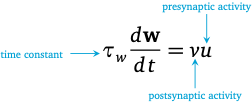

In [ ]:
# @title Define Helper Functions
def sim_data(n=10000,ratio=1,angle=0):
    """
    DEFINITION
    builds an oriented elliptic (or circular) gaussian cloud of 2D points
    
    INPUT
    n: the number of points
    ratio: (std along the short axis) / (std along the long axis)
    angle: the rotation angle in degrees
    """
    
    if ratio>1: ratio=1/ratio
    
    x = np.random.randn(n,1)
    y = ratio * np.random.randn(n,1)
    z = np.concatenate((x,y),1)
    radangle = (180 - angle) * np.pi / 180
    transfo = [[np.cos(radangle),np.sin(radangle)],[-np.sin(radangle), np.cos(radangle)]]
    data = np.dot(transfo,z.T).T
    return data


def plot_trace(data_cloud, weights_over_time=None):
    """
    Plots the datapoints and the time series of the weights
    Args:
        data_cloud (numpy.ndarray): n by 2 data
        weights_over_time (numpy.ndarray): n by 2 weights
    Returns:
    """
    plt.scatter(
        data_cloud[:, 0],
        data_cloud[:, 1],
        marker=".",
        facecolor="none",
        edgecolor="#222222",
        alpha=.2
    )
    plt.xlabel("x1")
    plt.ylabel("x2")

    if weights_over_time is not None:
      # color time and plot with colorbar
      time = np.arange(len(weights_over_time))
      colors = plt.cm.cool(time / float(len(time)))
      sm = plt.cm.ScalarMappable(
          cmap=plt.cm.cool,
          norm=plt.Normalize(vmin=0, vmax=len(data_cloud))
      )
      sm.set_array(time)
      cb = plt.colorbar(sm)
      cb.set_label("Iteration")
      plt.scatter(
          weights_over_time[:, 0],
          weights_over_time[:, 1],
          facecolor=colors,
          edgecolor="none",
          lw=2
      )

    # ensure rectangular plot
    x_min = data_cloud[:, 0].min()
    x_max = data_cloud[:, 0].max()
    y_min = data_cloud[:, 1].min()
    y_max = data_cloud[:, 1].max()
    lims = [min(x_min, y_min), max(x_max, y_max)]
    plt.xlim(lims)
    plt.ylim(lims)
    plt.show()


def plot_weights(weights_course):
    """
    Plots the datapoints and the time series of the weights
    Args:
        data_cloud (numpy.ndarray): n by 2 data
        weights_course (numpy.ndarray): n by 2 weights
    Returns:
    """
    plt.ylabel("magnitude")
    plt.xlabel("time")

    # color time and plot with colorbar
    time = np.arange(len(weights_course))
    colors = plt.cm.cool(time / float(len(time)))

    plt.plot(
        time,
        weights_course[:, 0],
        lw=2
    )

    plt.plot(
        time,
        weights_course[:, 1],
        lw=2
    )

    plt.show()


*Below* you can find a simple function implementing Hebbian plasticity.

In [ ]:
def Hebb(data, initial_angle=None, lr=0.005):
    """Run one batch of a simple Hebbian learning rule over
    a cloud of datapoints.
    Args:
        data (numpy.ndarray): An N by 2 array of datapoints. You can
            think of each of the two columns as the time series of firing rates of one presynaptic neuron.
        initial_angle (float, optional): angle of initial
            set of weights [deg]. If None, this is random.
        lr (float, optional): learning rate
    Returns:
        numpy.ndarray: time course of the weight vector
    """

    # get random initial weights
    if initial_angle is None:
        initial_angle = np.random.rand() * 360.
    radangle = initial_angle * np.pi / 180.
    w = np.array([np.cos(radangle), np.sin(radangle)])

    # save the trajectory of the weights
    weights_over_time = np.zeros((len(data), 2), float)
    for i in range(0, len(data)):
        weights_over_time[i] = w
        u = data[i]
        v = np.dot(w, u)  # output: postsynaptic firing rate of a linear neuron.
        # Hebb rule (data[i] are the two presynaptic firing rates at time point i
        w = w + lr * v * u     # update weights

    return weights_over_time


To run it, let's first simulate presynaptic activity over 200 timesteps.

In [ ]:
data = sim_data(n=200, ratio=.3, angle=60)                  # generate random spiking data for our presynaptic neurons
plot_trace(data)

and simulate a postsynaptic neuron receiving this input using our basic hebbian learning rule.

In [ ]:
weights_over_time = Hebb(data, initial_angle=-20, lr=0.04)  # simulate a postsynaptic neuron using a simple hebbian learning rule
plot_weights(weights_over_time)

As the most basic form of Hebb's rule only models synaptic potentiation, the weights for both simulated presynaptic neurons only increase over time.


### 3.1 - BCM Rule:
Implement the Bienenstock-Cooper-Munro learning rule of equation 8.13 in Dayan & Abbott.

In [ ]:
def BCM(data, initial_angle=None, theta=-1, lr1=0.005, lr2 = 0.05):
    """Run one batch of Bienenstock-Cooper-Munro's learning rule over
    a cloud of datapoints.
    Args:
        data (numpy.ndarray): An N by 2 array of datapoints. You can
            think of each of the two columns as the time series of firing rates of one presynaptic neuron.
        initial_angle (float, optional): angle of initial
            set of weights [deg]. If None, this is random.
        lr1 (float, optional): learning rate for the weight vector
        lr2 (float, optional): learning rate for theta
    Returns:
        numpy.ndarray: time course of the weight vector
    """

    # get angle if not set
    if initial_angle is None:
        initial_angle = np.random.rand() * 360.
    radangle = initial_angle * np.pi / 180.

    w = np.array([np.cos(radangle), np.sin(radangle)])
    weights_over_time = np.zeros((len(data), 2), float)
    for i in range(0, len(data)):
        weights_over_time[i] = w
        u = data[i]
        v = ...  # output: postsynaptic firing rate of a linear neuron.
        # BCM rule (data[i] are the two presynaptic firing rates at time point i
        theta = theta + ...  # update theta
        w = w + ...    # update weights

    return weights_over_time


data = sim_data(n=20000, ratio=..., angle=...)
weights_over_time = BCM(data, theta=0, lr1=..., lr2=...)
plot_trace(data, weights_over_time)
plot_weights(weights_over_time)

* Implement the BCM rule. Vary both learning rates. What do you observe? What happens when 
  * lr1 is larger than lr2?
  * lr2 is larger than lr1?
  * lr1 is equal to lr2 ?
* Plot the time course of the norm of the weights vector
* How does the simulation perform if you use data that is not centered at 0?
* Next, run the simulation on a data set which has no correlations. Use the functions `sim_data` and `BCM` to get the timecourse for weights that are learned on a circular data cloud (`ratio=1`). Plot the time course of both components of the weight vector. Repeat this many times (BCM will choose random initial conditions on each run), and plot this into the same plot. Can you explain what happens?



### 3.2 - Oja's rule
Implement a Hebbian learning rule with multiplicative normalization (Oja's rule)(see equation 8.16 in Dayan & Abbott).

In [ ]:
def oja(data, initial_angle=None, lr=0.005):
    """Run one batch of Oja's learning over
    a cloud of datapoints.
    Args:
        data (numpy.ndarray): An N by 2 array of datapoints. You can
            think of each of the two columns as the time series of firing rates of one presynaptic neuron.
        initial_angle (float, optional): angle of initial
            set of weights [deg]. If None, this is random.
        lr (float, optional): learning rate
    Returns:
        numpy.ndarray: time course of the weight vector
    """

    # get random initial weights
    if initial_angle is None:
        initial_angle = np.random.rand() * 360.
    radangle = initial_angle * np.pi / 180.

    w = np.array([np.cos(radangle), np.sin(radangle)])
    weights_over_time = np.zeros((len(data), 2), float)
    for i in range(0, len(data)):
        weights_over_time[i] = w
        u = data[i]  # ojas rule (data[i] are the two presynaptic firing rates at time point i
        v = ...  # output: postsynaptic firing rate of a linear neuron.
        # ojas rule (data[i] are the two presynaptic firing rates at time point i
        w = ...
    return weights_over_time

data = sim_data(n=20000, ratio=..., angle=...)
weights_over_time = oja(data, lr=...)
plot_trace(data, weights_over_time)
plot_weights(weights_over_time)

* Implement Oja's rule. Then modify the script with smaller / larger learning rates. What do you observe?
* Plot the time course of the norm of the weights vector.
* How does the simulation perform if you use data that is not centered at 0?
* Next, run the simulation on a data set which has no correlations. Use the functions `sim_data` and `oja` to get the timecourse for weights that are learned on a circular data cloud (`ratio=1`). Plot the time course of both components of the weight vector. Repeat this many times (oja will choose random initial conditions on each run), and plot this into the same plot. Can you explain what happens?